<a href="https://colab.research.google.com/github/Nathalia1234/Tarefa-2.6---Roteiro_CNN_-_Transferlearning/blob/main/Tarefa_2_6_Treinamento_TENSORFLOW(train_model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.1000 - loss: 2.3028 - val_accuracy: 0.0933 - val_loss: 2.3029
Epoch 2/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.1003 - loss: 2.3028 - val_accuracy: 0.0933 - val_loss: 2.3029
Epoch 3/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1008 - loss: 2.3027 - val_accuracy: 0.0996 - val_loss: 2.3028
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0976 - loss: 2.3027


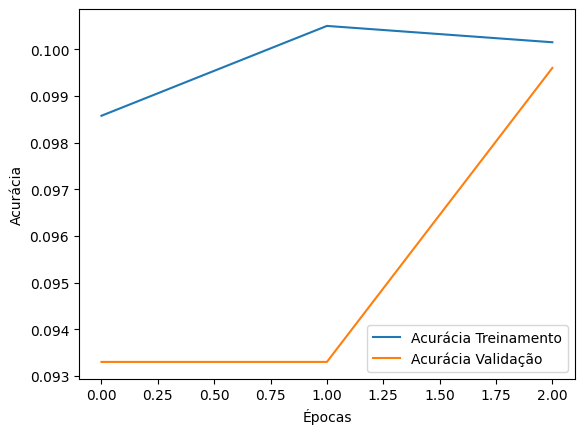

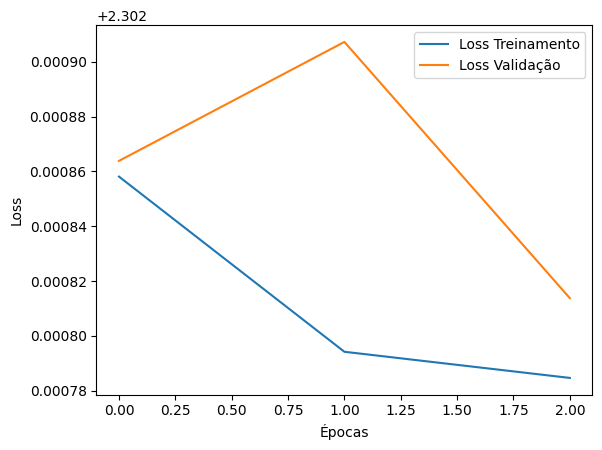

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


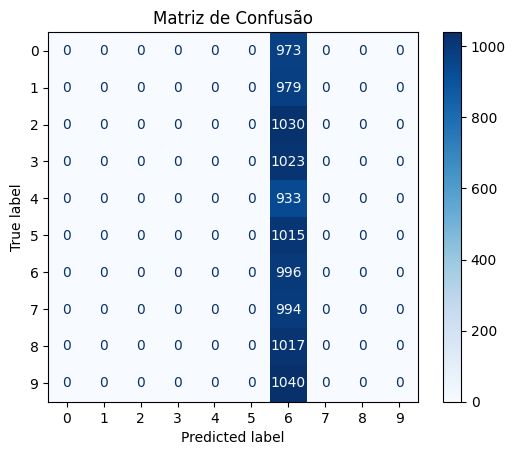

In [1]:
#Importação de Bibliotecas
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import os

# Carregar o dataset CIFAR-10
(X, y), (X_test, y_test) = cifar10.load_data()

# Normalizar os dados para ficar entre 0 e 1
X = X.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

#Carregamento e Pré-Processamento dos Dados
# Exemplo de carregamento e divisão dos dados
# Substitua 'X' e 'y' com seus dados e rótulos reais
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização de imagens (0-1)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Codificação dos rótulos, se necessário
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)
#Criação do Modelo
model = models.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),

    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # Ajuste o número de saídas para as classes do seu dataset
])
#Compilação do Modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#Treinamento do Modelo
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))
model.save('best_model.keras')
#Avaliação e Visualização das Métricas
# Avaliação
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Exemplo de gráfico de acurácia e loss
plt.plot(history.history['accuracy'], label='Acurácia Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Loss Treinamento')
plt.plot(history.history['val_loss'], label='Loss Validação')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.show()
#Matriz de Confusão:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()